<a href="https://colab.research.google.com/github/manisha9608/fake_and_real_news/blob/main/fake_real_batch_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries & Dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.1 Import Libraries

In [2]:
import numpy as np
import pandas as pd

import csv

import time

import io
from io import BytesIO


import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout
from tensorflow.keras import Model
from tensorflow.python.client import device_lib
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# from keras.layers import Dense, Dropout, Activation, Flatten

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

## 1.2 Check GPU Availability

In [3]:

tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15181727386848264004, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 5749007934662435790
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [5]:
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:         9217444 kB
MemAvailable:   11971212 kB
Buffers:           88812 kB
Cached:          2664704 kB
SwapCached:            0 kB
Active:          1358476 kB
Inactive:        2317964 kB
Active(anon):     745588 kB
Inactive(anon):    10692 kB
Active(file):     612888 kB
Inactive(file):  2307272 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              3828 kB
Writeback:             0 kB
AnonPages:        922880 kB
Mapped:           639164 kB
Shmem:             11412 kB
KReclaimable:     150168 kB
Slab:             205176 kB
SReclaimable:     150168 kB
SUnreclaim:        55008 kB
KernelStack:        6096 kB
PageTables:         9716 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    4334888 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       52368 kB
VmallocChunk:          0 kB
Percpu:          

## 1.2 Load Data

In [6]:
path = "/content/drive/MyDrive/data/imdb/"

In [7]:

# real = pd.read_excel(path+"True.xlsx")
# fake = pd.read_excel(path+"Fake.xlsx")

# from google.colab import files
# uploaded = files.upload()

In [8]:


bio = BytesIO()
with open(path+"True.csv", 'rb') as f:
   bio.write(f.read())
bio.seek(0)

real = pd.read_csv(bio)

In [9]:
# uploaded = files.upload()

In [10]:
bio = BytesIO()
with open(path+"Fake.csv", 'rb') as f:
   bio.write(f.read())
bio.seek(0)
fake = pd.read_csv(bio)

In [11]:
real.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [12]:
cols = ['title', 'text', 'subject', 'date']
real = real[cols]
for col in cols:
  real[col] = real[col].str.strip()
real.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [13]:
fake = fake[cols]
for col in cols:
  fake[col] = fake[col].str.strip()
fake.head(2)


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’s...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian C...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


# 2. Data Visualization

## 2.1 Print at least two texts from each class (fake & real) of the dataset

In [14]:
# Create Target based on Real and Fake data
real['Label'] = 1
fake['Label'] = 0

In [15]:
pd.set_option('display.max_colwidth', None)
real.iloc[[0,1],[1,2]]

text       subject
0  WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support education, scientific research, infrastructure, public health and environmental protection. “The (Trump) administration has already been willing to say: ‘We’re going to increase non-defense discretionary spending ... by about 7 percent,’” Meadows, chairman of the small but influential House Freedom Caucus, said on the program. “Now, Democrats are saying that’s not enough, we need to give the government a pay raise of 10 to 11 percent. For a fiscal conservative, I don’t see where the rationale is. ... Eventually you run out of other people’s money,” he said. Meadows was among Republicans who voted in late December for their party’s debt-financed tax overhaul, which is expected to balloon the federal budget deficit and add about $1.5 trillion over 10 years to the $20 trillion national debt. “It’s interesting to hear Mark talk about fiscal responsibility,” Democratic U.S. Representative Joseph Crowley said on CBS. Crowley said the Republican tax bill would require the  United States to borrow $1.5 trillion, to be paid off by future generations, to finance tax cuts for corporations and the rich. “This is one of the least ... fiscally responsible bills we’ve ever seen passed in the history of the House of Representatives. I think we’re going to be paying for this for many, many years to come,” Crowley said. Republicans insist the tax package, the biggest U.S. tax overhaul in more than 30 years,  will boost the economy and job growth. House Speaker Paul Ryan, who also supported the tax bill, recently went further than Meadows, making clear in a radio interview that welfare or “entitlement reform,” as the party often calls it, would be a top Republican priority in 2018. In Republican parlance, “entitlement” programs mean food stamps, housing assistance, Medicare and Medicaid health insurance for the elderly, poor and disabled, as well as other programs created by Washington to assist the needy. Democrats seized on Ryan’s early December remarks, saying they showed Republicans would try to pay for their tax overhaul by seeking spending cuts for social programs. But the goals of House Republicans may have to take a back seat to the Senate, where the votes of some Democrats will be needed to approve a budget and prevent a government shutdown. Democrats will use their leverage in the Senate, which Republicans narrowly control, to defend both discretionary non-defense programs and social spending, while tackling the issue of the “Dreamers,” people brought illegally to the country as children. Trump in September put a March 2018 expiration date on the Deferred Action for Childhood Arrivals, or DACA, program, which protects the young immigrants from deportation and provides them with work permits. The president has said in recent Twitter messages he wants funding for his proposed Mexican border wall and other immigration law changes in exchange for agreeing to help the Dreamers. Representative Debbie Dingell told CBS she did not favor linking tha

In [16]:
fake.iloc[[0,1],[1,2]]

,text,subject
0,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News
1,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former aide set up meetings with world leaders for Trump, but team Trump ran with him being merely a coffee boy.In May 2016, Papadopoulos revealed to Australian diplomat Al

In [17]:
print(real.shape)

(21417, 5)


In [18]:
print(fake.shape)
fake.head()

(23481, 5)


,title,text,subject,date,Label
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.",News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known b

In [19]:
dataset = pd.concat([real, fake]).reset_index(drop=True)

In [20]:
print(dataset.shape)
dataset.head()

(44898, 5)


title  ... Label
0       As U.S. budget fight looms, Republicans flip their fiscal script  ...     1
1       U.S. military to accept transgender recruits on Monday: Pentagon  ...     1
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'  ...     1
3            FBI Russia probe helped by Australian diplomat tip-off: NYT  ...     1
4  Trump wants Postal Service to charge 'much more' for Amazon shipments  ...     1

[5 rows x 5 columns]

In [21]:
#Missing Value Analysis
dataset.isnull().sum()

title      0
text       0
subject    0
date       0
Label      0
dtype: int64

In [22]:
dataset['Label'].value_counts()

0    23481
1    21417
Name: Label, dtype: int64

## 2.2 Plot a bar graph of class distribution in a dataset.

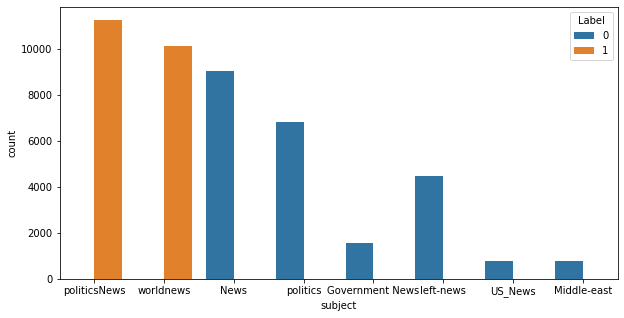

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x= "subject", hue = "Label", data=dataset)

Label
0    23481
1    21417
Name: text, dtype: int64


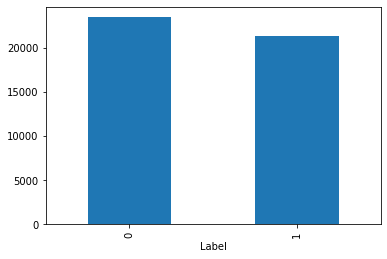

In [24]:
# How many fake and real articles?
print(dataset.groupby(['Label'])['text'].count())
dataset.groupby(['Label'])['text'].count().plot(kind="bar")
plt.show()

In [25]:
print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.5.0
Eager mode:  True
Hub version:  0.12.0
GPU is available


## 2.3 Print the shapes of train and test data.

In [26]:
# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(dataset['text'], dataset.Label, test_size=0.2, random_state=42)

In [27]:
X_train.shape

(35918,)

In [28]:
X_test.shape

(8980,)

In [29]:
y_train.shape

(35918,)

In [30]:
y_test.shape

(8980,)

# 3. Data Pre-Processing

In [31]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(X_train[:2])

<tf.Tensor: shape=(2, 50), dtype=float32, numpy=
array([[ 0.6762637 ,  0.36566633,  0.15799001,  0.7455838 ,  0.10752916,
         0.02726057,  0.19175585, -0.53263694,  0.02645369, -0.34257412,
         0.18990925, -0.5863261 , -0.08813672, -0.05235053,  0.41364285,
        -0.10950428, -0.02759743,  0.23644386,  0.18427625, -0.26734704,
        -0.0806255 , -0.05824664,  0.35589135,  0.1614714 , -0.03937   ,
         0.88691413, -0.8938478 , -0.01000619,  0.38181284, -0.39137727,
        -0.89207304,  0.3863561 ,  0.30663025,  0.14063565, -0.75426054,
         0.5474254 ,  0.5392539 ,  0.3541016 ,  0.36251965, -0.22261517,
        -0.21186964,  0.10848372, -0.3798515 ,  0.50062865, -0.5748089 ,
        -0.21696912, -0.09802147, -0.4701827 , -0.61109304, -0.33805057],
       [ 0.4502573 ,  0.33862573,  0.07409427,  0.17752995, -0.31967235,
         0.19493477, -0.24074934, -0.00411644,  0.42225355, -0.01860114,
        -0.3425406 ,  0.25350344,  0.32082883, -0.4217546 ,  0.36043105,
 

In [32]:
X_train.head()

36335                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

# 4. Model Building

## 4.1 Model Architecture

In [33]:
learning_rate = 0.001
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(8, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
# model.add(Dropout(0.25))
model.add(tf.keras.layers.Dense(8, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
model.add(tf.keras.layers.Dense(8, activation='relu', activity_regularizer=tf.keras.regularizers.l2(learning_rate)))
model.add(Dropout(0.25)) # to avoid overfitting
# output layer
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) # since binary classification


## 4.2 Model Summary

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dense (Dense)                (None, 8)                 408       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 48,191,161
Trainable params: 48,191,161
Non-trainable params: 0
____________________________________________

# 5. Model Compilation

In [35]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# using the default learning rate

# 6. Model Training

## 6.1 Train the model

In [36]:
# history= model.fit(X_train.shuffle(10000).batch(512), epochs=10, validation=validation_data.batch(512), verbose=1)
start = time.time()
history = model.fit(X_train, y_train, batch_size = 10,epochs = 10, validation_data=(X_test, y_test), verbose=1)
end = time.time()

Epoch 1/10
3592/3592 [==============================] - 114s 31ms/step - loss: 0.0742 - accuracy: 0.9843 - val_loss: 0.0382 - val_accuracy: 0.9923
Epoch 2/10
3592/3592 [==============================] - 109s 30ms/step - loss: 0.0234 - accuracy: 0.9975 - val_loss: 0.0170 - val_accuracy: 0.9971
Epoch 3/10
3592/3592 [==============================] - 109s 30ms/step - loss: 0.0190 - accuracy: 0.9970 - val_loss: 0.0129 - val_accuracy: 0.9979
Epoch 4/10
3592/3592 [==============================] - 109s 30ms/step - loss: 0.0158 - accuracy: 0.9975 - val_loss: 0.0148 - val_accuracy: 0.9976
Epoch 5/10
3592/3592 [==============================] - 109s 30ms/step - loss: 0.0165 - accuracy: 0.9971 - val_loss: 0.0279 - val_accuracy: 0.9945
Epoch 6/10
3592/3592 [==============================] - 109s 30ms/step - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.0217 - val_accuracy: 0.9962
Epoch 7/10
3592/3592 [==============================] - 109s 30ms/step - loss: 0.0163 - accuracy: 0.9968 - val_loss: 0

## 6.2 Loss graphs

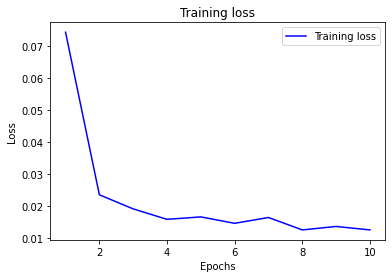

In [37]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

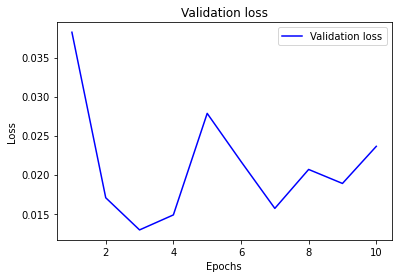

In [38]:
# "bo" is for "blue dot"
# plt.plot(epochs, loss, 'g', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 6.3 Time taken

In [39]:
print("Total time taken in training the model: ", end - start, "seconds")

Total time taken in training the model:  1096.5167565345764 seconds


# 7. Model Evaluation

## 7.1 Final Model Train & Validation loss & accuracy

In [40]:
epochs[-1]

10

In [41]:
n = epochs[-1]-1
print(f'Final Train Accuracy {acc[n]}')
print(f'Final Validation Accuracy {val_acc[n]}')

print(f'\nFinal Train Loss {loss[n]}')
print(f'Final Validation Loss {val_loss[n]}')

Final Train Accuracy 0.9973829388618469
Final Validation Accuracy 0.9958797097206116

Final Train Loss 0.012461581267416477
Final Validation Loss 0.023627983406186104


## 7.2 Model Prediction

In [42]:
pred = model.predict(X_test)
pred = (pred > 0.5).astype(float)
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

## 7.3 Confusion Matrix

In [43]:
cm = confusion_matrix(y_test, pred)

cm

array([[4631,   19],
       [  18, 4312]])

## 7.4 Test Accuracy

In [44]:
acuracy = accuracy_score(y_test, pred)
print(f'Accuracy of the model is: {acuracy}')

Accuracy of the model is: 0.995879732739421


## 7.5 Classification Report

In [45]:
print(classification_report(y_test, pred, digits=5))

              precision    recall  f1-score   support

           0    0.99613   0.99591   0.99602      4650
           1    0.99561   0.99584   0.99573      4330

    accuracy                        0.99588      8980
   macro avg    0.99587   0.99588   0.99587      8980
weighted avg    0.99588   0.99588   0.99588      8980



## 7.6 Incorrectly classified texts analysis

In [46]:
len(X_test)

8980

In [47]:
X_test = pd.DataFrame(X_test, columns = ['text'])
X_test['label'] = y_test
X_test['pred'] = pred
X_test['pred'] = X_test['pred'].fillna(0)

In [48]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8980 entries, 22216 to 15236
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    8980 non-null   object 
 1   label   8980 non-null   int64  
 2   pred    8980 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 280.6+ KB


In [49]:
X_test.head(2)

,text,label,pred
22216,"Donald Trump s White House is in chaos, and they are trying to cover it up. Their Russia problems are mounting by the hour, and they refuse to acknowledge that there are problems surrounding all of this. To them, it s fake news, or a hoax. However, the facts bear things out differently, and it seems that there are now cracks in the Congressional public leadership.Chuck Grassley (R-Iowa), who heads the Senate Judiciary Committee, is fed up. He is now demanding that Donald Trump, Jr. and former 2016 Trump Campaign Manager Paul Manafort testify before his committee regarding the now infamous shady meeting between Donald Trump and the shady Russian lawyer who promised dirt on 2016 Democratic Presidential nominee Hillary Clinton. In fact, this information is due, well, NOW. This demand sends a few signals to team Trump most notably that they should not fire Special Counsel Robert Mueller under any circumstances, despite the fact that it seems that this seems to be what Trump s White House is laying the groundwork, so to speak, to do as we speak.Here is the tweet regarding Grassley s warning:Also, anyone who thinks that Senator Grassley and the rest of the Senate are not serious about this only needs to look at the warning that has already been given: Trump Jr. and Manafort will either follow orders, or be served with subpoenas that force them to comply. If they refuse, they will be held in contempt of Congress, which carries with it serious jail time.Even the cruel, craven creatures within the GOP are sick of Donald Trump s corruption and his scandal-ridden White House. They are angry that he staged a hostile takeover of their party, first with birtherism and giving them a permanently racist label all while decimating all efforts that were made to pretend the Republican Party isn t a hotbed of racism, and while turning their worlds upside down, and with it, the nation. It seems that old-timers like Grassley, who are clearly sick of Trump s bullshit, just might be the ones who could save the republic. All they need is a bit of courage.Featured image via Win McNamee/Getty Images",0,0.0
27917,"Now that Donald Trump is the presumptive GOP nominee, it s time to remember all those other candidates who tried so hard to beat him in the race to the White House. After all, how can we forget all the missteps, gaffes, weirdness, and sheer idiocies of such candidates as Jeb Bush, Marco Rubio, John Kasich, Ted Cruz, Ben Carson, and Carly Fiorina?There s a video making the rounds on Twitter that does just that, and eulogizes three of these failed candidates as though they re dead (and the GOP itself might as well be dead at this point anyway). Appropriately titled, A Eulogy for the GOP, people make short speeches about each of these candidates.Once past the man who actually says Jeb Bush was qualified to be president, there are fake tears, with journalist and comedienne Francesca Fiorentini saying: Dearly beloved, we re gathered here today to commemorate the candidates that are no longer with us. One man, speaking to an amusing, circus-y rendition of Chopin s Funeral March, remembers Jeb this way: Jeb, we hardly knew ye. It s too bad that your policies couldn t find their way out of the Republican morass. Indeed, it was like Jeb and his policies were invisible sometimes, although many felt that he would win the nomination early on. His best performances often came during debates, when he d get into out-and-out fights with Donald Trump over virtually everything under the sun. He also had a bad habit of defending his brother s actions in Iraq, memorably saying, As it relates to my brother, there s one thing I know for sure: He kept us safe. Moving on to Marco Rubio, Fiorentini herself says: He was called so many things: Young, charming, Lil Marco.' That last nickname is, of course, a reference to Trump s penchant for name-calling. Then, a man speaking Spanish remembers Rubio this way: Marco, why aren t you a normal boy? Anot

### 7.6.1 Incorrectly classified 'true' class

In [50]:
df = X_test.loc[(X_test['label']==1) & (X_test['pred']!=1)]

In [51]:
len(df)

18

In [52]:
df = df.reset_index(drop=True)
df.loc[:2]

text  ...  pred
0  BEIJING/NEW DELHI (Reuters) - As U.S. President Donald Trump and some of America s democratic allies talk up a vision of  Indo-Pacific  cooperation, China is determined to ensure that the future belongs to  Asia .   The increasing use of the phrase  Indo-Pacific  by Trump and his team during their marathon Asian jaunt this week, instead of the  Asia-Pacific  term that has long been common in business and diplomacy, is being greeted with thinly-veiled sneers in Beijing.  Trump choosing to use the term and actually making it happen are two totally different things,  Diao Daming, an American studies expert at Renmin University in Beijing, told a forum on Friday.    The region is leading global development and Trump wants America to be first, so he could not ignore its existence. He had to say something to the region, so we have  Indo-Pacific . But as yet it s just a concept and we don t know what it means.  Beyond the wordplay lies both concern and scepticism in Beijing at U.S. attempts to complicate China s strategic domain, particularly by encouraging rival power India to work more closely militarily with Japan. Tokyo recently backed New Delhi during India s border stand-off with China.    Chinese Foreign Ministry spokeswoman Hua Chunying did not dignify  Indo-Pacific  by name in a statement this week, but noted that  this concept has been mentioned many times .    We hope that the Asia-Pacific region can become a stable, prosperous and orderly region....where we are capable of managing differences and have the wisdom to resolve the disputes,  she said.    Indo-Pacific  has grown in usage across diplomatic and security circles in Australia, India and Japan in recent years, shorthand for a broader and democratic-led region in place of the  Asia-Pacific , which to some places an authoritarian China too firmly at the center.   Trump and his team have given it fresh currency in recent days, starting in Seoul and Tokyo, building on the rhetoric of his secretary of state Rex Tillerson, who last month talked of the need to support a  free, open and thriving Indo-Pacific .   Describing the Indian and Pacific Oceans as a  single strategic arena , Tillerson went further as he described India and the United States as  bookends  within that region.    In concrete terms, it will lead to great co-ordination between the Indian, Japanese and American militaries including maritime domain awareness, anti-submarine warfare, amphibious warfare, and humanitarian assistance, disaster relief, and search and rescue,  he said.   Not all allies are convinced, however.   When Trump s White House issued a statement after the U.S.-South Korea summit on Wednesday describing the alliance as a  linchpin for stability, security and prosperity in the Indo-Pacific , South Korea s presidential Blue House issued a note of caution.   While the phrase  Indo-Pacific  matched some of South Korea s policies aimed at diversification,  we felt there was more discussion necessary to see whether it is an appropriate term to be used in our efforts toward...joint strategic goals , the Blue House statement said.   Welcoming the trend is Indian navy Captain Gurpreet Khurana, who was among the first to coin the Indo-Pacific concept in an academic paper back in 2007.   The rise of India as an economic power following its free market reforms and then its gradual military build-up was itself a key factor in the increasing significance of the Indian Ocean, he said.    India could no longer be excluded from any over-arching reckoning in the Asia-Pacific, be it economic or security related,  said Khurana, of the military-funded National Maritime Foundation. Chinese officials and experts have long bristled at any perceived attempt to contain a rising China.  But Trump s Indo-Pacific policy should not be underestimated by China, because India, Japan and Australia are united by being on the wrong side of China s development strategy for the region, according to Jia We

### 7.6.2 Incorreclty classified 'fake' class

In [53]:
df = X_test.loc[(X_test['label']==0) & (X_test['pred']!=0)]

In [54]:
len(df)

19

In [55]:
df = df.reset_index(drop=True)
df.loc[:2]

text  ...  pred
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Follow the money on this one Mexico is spending over $1.6 billion dollars on flat screens for millions at a cost of $145.00 instead of just $40.00 for a decoder box. I m sure if you dig deep enough you ll find some sort of Carlos Slim corruption. He s the Mexican billionaire who made tons of money on the  Obamaphone  he provided for America. Nice, huh? We ll be checking into this one just to see if there s any connection to American corruption. It just doesn t pass the smell test MEXICO CITY   Cradling a flat-screen television set in her arms, Tomasa Lopez beamed at her good fortune: She d just taken part in the world s biggest distribution of free digital televisions.Lopez, a domestic servant, was among thousands of people who ve thronged a cavernous tent in the populous working-class Iztapalapa district, one of hundreds of venues across Mexico where the poor are receiving some of the 10 million digital television sets the government is giving away at no charge.It s a program costing the Mexican treasury $1.6 billion in a push to convert the nation from analog television signals to a digital format. The United States made the switch in 2009. I am happy,  Lopez said.  We ve always wanted a digital television. We ll see more channels. The kids will see cartoons. Other nations